# First Class CorpsCeleste
Pour commencer on a utiliser chat gpt pour créer une première classe CorsCeleste.
Cela nous permet de nous familiariser avec l'environnement python et jupyter notebook.

In [2]:
import numpy as np

# Constante gravitationnelle (en SI : m^3 / (kg . s^2))
G = 6.67430e-11

class CorpsCeleste:
    """
    Représente un corps céleste pour une simulation gravitationnelle.

    Attributs:
    ----------
    masse : float
        Masse du corps (en kilogrammes).
    position : np.ndarray
        Vecteur position (en mètres) sous forme d'un array NumPy, ex: np.array([x, y, z]).
    vitesse : np.ndarray
        Vecteur vitesse (en mètres par seconde), ex: np.array([vx, vy, vz]).
    force : np.ndarray
        Vecteur force (en Newton) subi par le corps (sera mis à jour à chaque itération).
    """

    def __init__(self, masse, position, vitesse):
        """
        Initialise un objet CorpsCeleste.

        Paramètres:
        -----------
        masse : float
            La masse du corps (en kg).
        position : array-like
            Position initiale du corps (en m).
        vitesse : array-like
            Vitesse initiale du corps (en m/s).
        """
        self.masse = masse
        # On convertit en np.array pour faciliter les opérations vectorielles
        self.position = np.array(position, dtype=float)
        self.vitesse = np.array(vitesse, dtype=float)
        # Force initiale à zéro
        self.force = np.zeros(3, dtype=float)

    def calculer_force_gravitationnelle(self, autre_corps):
        """
        Calcule la force gravitationnelle exercée par 'autre_corps' sur ce corps.

        Paramètres:
        -----------
        autre_corps : CorpsCeleste
            L'autre corps céleste qui exerce la force gravitationnelle.

        Retourne:
        ---------
        np.ndarray
            Le vecteur force (en Newton) exercée sur ce corps.
        """
        # Vecteur direction (autre_corps -> self)
        direction = autre_corps.position - self.position
        distance = np.linalg.norm(direction)

        if distance == 0:
            # Pour éviter la division par zéro si deux corps ont la même position
            return np.zeros(3, dtype=float)

        # Force scalaire
        force_magnitude = G * self.masse * autre_corps.masse / (distance ** 2)

        # Vecteur unitaire
        force_vector = (force_magnitude / distance) * direction

        return force_vector

    def mettre_a_jour_force(self, liste_corps):
        """
        Met à jour la force nette subie par ce corps,
        en sommant les forces de gravité de chaque corps dans liste_corps.

        Paramètres:
        -----------
        liste_corps : list
            Liste de tous les CorpsCeleste impliqués dans la simulation
            (y compris ce corps, qui sera ignoré dans la somme).
        """
        # On remet la force à zéro avant de recalculer
        self.force = np.zeros(3, dtype=float)

        for corps in liste_corps:
            # On ne calcule pas la force avec soi-même
            if corps is not self:
                self.force += self.calculer_force_gravitationnelle(corps)

    def maj_position_et_vitesse(self, dt):
        """
        Met à jour la position et la vitesse du corps selon un schéma d'Euler simple.

        Paramètres:
        -----------
        dt : float
            Le pas de temps (en secondes).
        """
        # Accélération = F / m
        acceleration = self.force / self.masse

        # Mise à jour de la vitesse
        self.vitesse += acceleration * dt

        # Mise à jour de la position
        self.position += self.vitesse * dt

    def __str__(self):
        """
        Méthode optionnelle pour avoir une représentation lisible de l'objet.
        """
        return (f"CorpsCeleste(masse={self.masse}, "
                f"position={self.position}, "
                f"vitesse={self.vitesse}, "
                f"force={self.force})")








# Calculs pour Terre et Lune
xxx

In [3]:
# Terre : masse ~ 5.97219e24 kg
terre = CorpsCeleste(
    masse=5.97219e24,
    position=[0, 0, 0],   # Au repos à l'origine
    vitesse=[0, 0, 0]
)

# Lune : masse ~ 7.3477e22 kg
# Distance moyenne ~ 3.844e8 m, vitesse orbitale ~ 1.022e3 m/s
lune = CorpsCeleste(
    masse=7.3477e22,
    position=[3.844e8, 0, 0],   # Sur l'axe x, à ~ 384 400 km de la Terre
    vitesse=[0, 1.022e3, 0]     # En orbite circulaire simplifiée (axe y)
)

# Liste de tous les corps
liste_corps = [terre, lune]

# Exemple de boucle de simulation
dt = 60.0  # 1 minute en secondes
nombre_iterations = 1000

for _ in range(nombre_iterations):
    # Calcul de la force sur chaque corps
    for c in liste_corps:
        c.mettre_a_jour_force(liste_corps)
    # Mise à jour position/vitesse
    for c in liste_corps:
        c.maj_position_et_vitesse(dt)

# Affichage final
print("État final après la simulation :")
print("Terre :", terre)
print("Lune  :", lune)

État final après la simulation :
Terre : CorpsCeleste(masse=5.97219e+24, position=[59674.60240527  3172.76358622     0.        ], vitesse=[1.98300865 0.15835193 0.        ], force=[1.95727218e+20 3.14599619e+19 0.00000000e+00])
Lune  : CorpsCeleste(masse=7.3477e+22, position=[3.79549665e+08 6.10621187e+07 0.00000000e+00], vitesse=[-161.1783878  1009.12919911    0.        ], force=[-1.95727218e+20 -3.14599619e+19  0.00000000e+00])


# First Simulation
With matplotlib, we simulate graphically the Earth and Moon movements.

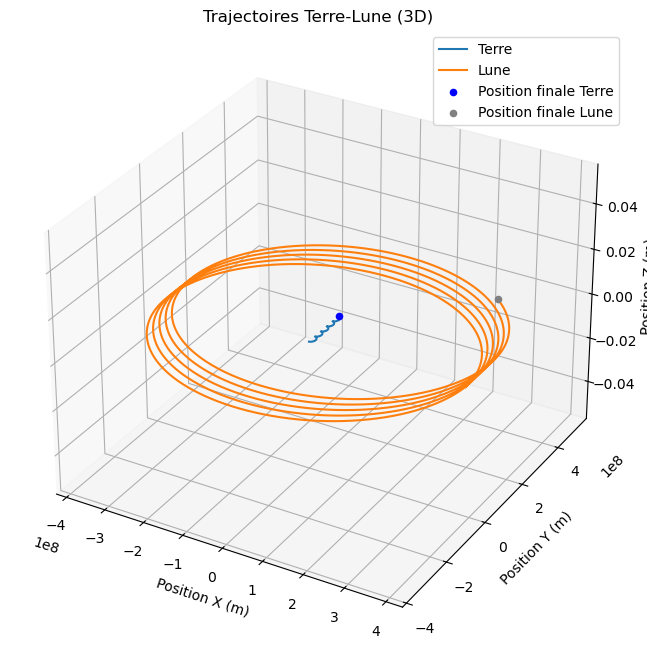

In [4]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11

class CorpsCeleste:
    def __init__(self, masse, position, vitesse):
        self.masse = masse
        self.position = np.array(position, dtype=float)
        self.vitesse = np.array(vitesse, dtype=float)
        self.force = np.zeros(3, dtype=float)

    def calculer_force_gravitationnelle(self, autre_corps):
        direction = autre_corps.position - self.position
        distance = np.linalg.norm(direction)
        if distance == 0:
            return np.zeros(3, dtype=float)
        force_magnitude = G * self.masse * autre_corps.masse / (distance**2)
        force_vector = (force_magnitude / distance) * direction
        return force_vector

    def mettre_a_jour_force(self, liste_corps):
        self.force = np.zeros(3, dtype=float)
        for c in liste_corps:
            if c is not self:
                self.force += self.calculer_force_gravitationnelle(c)

    def maj_position_et_vitesse(self, dt):
        # Accélération = F / m
        acceleration = self.force / self.masse
        self.vitesse += acceleration * dt
        self.position += self.vitesse * dt

# --- Définition Terre & Lune ---
terre = CorpsCeleste(
    masse=5.97219e24,
    position=[0, 0, 0],
    vitesse=[0, 0, 0]
)
lune = CorpsCeleste(
    masse=7.3477e22,
    position=[3.844e8, 0, 0],
    vitesse=[0, 1.022e3, 0]
)

liste_corps = [terre, lune]

# --- Paramètres de simulation ---
dt = 600.0        # 10 minute en secondes
nb_iterations = 20000

# Pour stocker les positions au fil du temps
positions_terre = []
positions_lune = []

# --- Boucle de simulation ---
for _ in range(nb_iterations):
    # Mise à jour de la force
    for c in liste_corps:
        c.mettre_a_jour_force(liste_corps)

    # Mise à jour de la position et de la vitesse
    for c in liste_corps:
        c.maj_position_et_vitesse(dt)

    # Enregistrement des positions actuelles
    positions_terre.append(terre.position.copy())
    positions_lune.append(lune.position.copy())

#      # --- Conversion en arrays NumPy pour faciliter le plotting ---
#      positions_terre = np.array(positions_terre)
#      positions_lune = np.array(positions_lune)
#      
#      # --- Visualisation ---
#      plt.figure(figsize=(6,6))
#      plt.plot(positions_terre[:,0], positions_terre[:,1], label='Terre')
#      plt.plot(positions_lune[:,0], positions_lune[:,1], label='Lune')
#      
#      plt.xlabel('Position X (m)')
#      plt.ylabel('Position Y (m)')
#      plt.title("Trajectoires Terre-Lune (2D simplifiée)")
#      plt.legend()
#      plt.axis('equal')  # Échelle identique sur X et Y
#      plt.show()
#      

# --- Conversion en arrays NumPy pour faciliter le plotting ---
positions_terre = np.array(positions_terre)
positions_lune = np.array(positions_lune)

# --- Visualisation 3D ---
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Tracé des trajectoires
ax.plot(positions_terre[:,0], positions_terre[:,1], positions_terre[:,2], label='Terre')
ax.plot(positions_lune[:,0], positions_lune[:,1], positions_lune[:,2], label='Lune')

# Marqueurs pour les positions finales
ax.scatter(positions_terre[-1,0], positions_terre[-1,1], positions_terre[-1,2], color='blue', marker='o', label="Position finale Terre")
ax.scatter(positions_lune[-1,0], positions_lune[-1,1], positions_lune[-1,2], color='gray', marker='o', label="Position finale Lune")

# Labels des axes
ax.set_xlabel('Position X (m)')
ax.set_ylabel('Position Y (m)')
ax.set_zlabel('Position Z (m)')
ax.set_title("Trajectoires Terre-Lune (3D)")

ax.legend()
plt.show()


## The same with T_MAX (and not any more a nb of iteration)

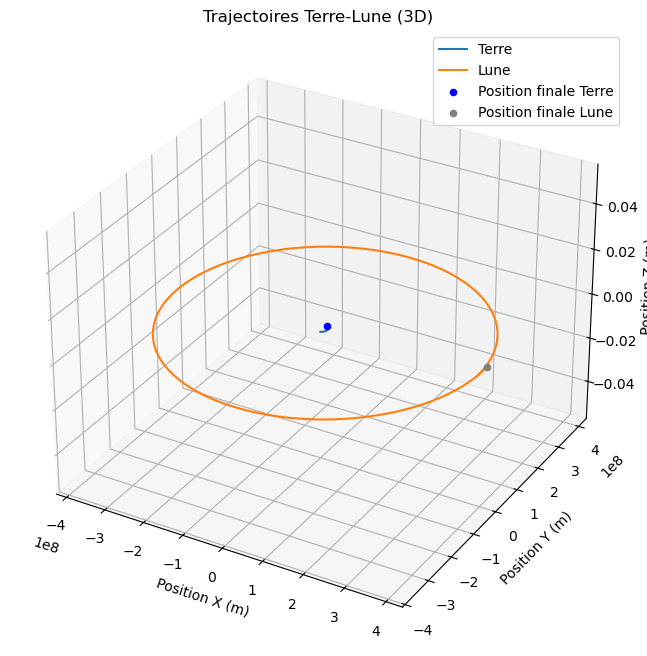

In [5]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67430e-11

class CorpsCeleste:
    def __init__(self, masse, position, vitesse, nom=""):
        self.nom = nom  # Ajout d'un nom pour faciliter le debug
        self.masse = masse
        self.position = np.array(position, dtype=float)
        self.vitesse = np.array(vitesse, dtype=float)
        self.force = np.zeros(3, dtype=float)

    def calculer_force_gravitationnelle(self, autre_corps):
        direction = autre_corps.position - self.position
        distance = np.linalg.norm(direction)
        if distance == 0:
            return np.zeros(3, dtype=float)
        force_magnitude = G * self.masse * autre_corps.masse / (distance**2)
        force_vector = (force_magnitude / distance) * direction
        return force_vector

    def mettre_a_jour_force(self, liste_corps):
        self.force = np.zeros(3, dtype=float)
        for c in liste_corps:
            if c is not self:
                self.force += self.calculer_force_gravitationnelle(c)

    def maj_position_et_vitesse(self, dt):
        acceleration = self.force / self.masse
        self.vitesse += acceleration * dt
        self.position += self.vitesse * dt

# --- Définition Terre & Lune ---
terre = CorpsCeleste(
    masse=5.97219e24,
    position=[0, 0, 0],
    vitesse=[0, 0, 0],
    nom="Terre"
)
lune = CorpsCeleste(
    masse=7.3477e22,
    position=[3.844e8, 0, 0],
    vitesse=[0, 1.022e3, 0],
    nom="Lune"
)

liste_corps = [terre, lune]

# --- Paramètres de simulation ---
dt = 600.0  # 10 minutes en secondes
T_MAX = 27.3 * 24 * 3600  # ~27,3 jours en secondes (1 cycle lunaire approx.)
# Pour stocker les positions au fil du temps
positions_terre = []
positions_lune = []

t = 0  # Initialisation du temps
iteration = 0  # Compteur d'itérations

# --- Boucle de simulation ---
while t < T_MAX:
    # Mise à jour de la force
    for c in liste_corps:
        c.mettre_a_jour_force(liste_corps)

    # Mise à jour de la position et de la vitesse
    for c in liste_corps:
        c.maj_position_et_vitesse(dt)

    # Enregistrement des positions actuelles
    positions_terre.append(terre.position.copy())
    positions_lune.append(lune.position.copy())

    # Calcul de la distance Terre-Lune
    distance_terre_lune = np.linalg.norm(lune.position - terre.position)

    # Debugging : Affichage des valeurs

    # Mise à jour du temps
    t += dt
    iteration += 1

# --- Conversion en arrays NumPy pour faciliter le plotting ---
positions_terre = np.array(positions_terre)
positions_lune = np.array(positions_lune)

# --- Visualisation 3D ---
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Tracé des trajectoires
ax.plot(positions_terre[:,0], positions_terre[:,1], positions_terre[:,2], label='Terre')
ax.plot(positions_lune[:,0], positions_lune[:,1], positions_lune[:,2], label='Lune')

# Marqueurs pour les positions finales
ax.scatter(positions_terre[-1,0], positions_terre[-1,1], positions_terre[-1,2], color='blue', marker='o', label="Position finale Terre")
ax.scatter(positions_lune[-1,0], positions_lune[-1,1], positions_lune[-1,2], color='gray', marker='o', label="Position finale Lune")

# Labels des axes
ax.set_xlabel('Position X (m)')
ax.set_ylabel('Position Y (m)')
ax.set_zlabel('Position Z (m)')
ax.set_title("Trajectoires Terre-Lune (3D)")

ax.legend()
plt.show()


## The same in Kepler 90 system

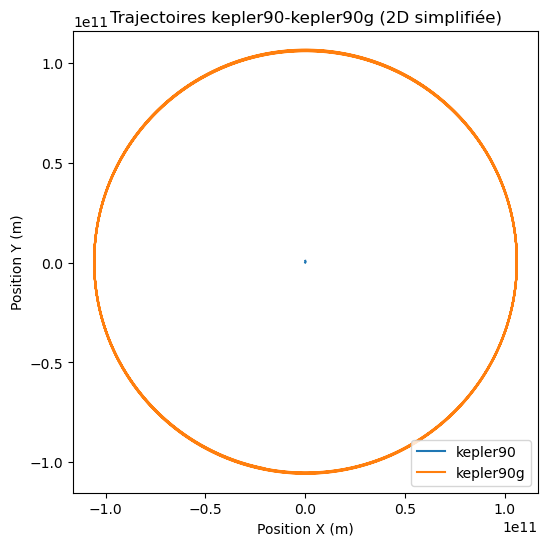

In [6]:
# --- Définition kepler-90 & kepler-90g ---
kepler90 = CorpsCeleste(
    masse=2.2e30,
    position=[0, 0, 0],
    vitesse=[0, 0, 0]
)
# --- Définition de Kepler-90 g (planète) ---
# D'après le CSV, SemiMajorAxis_m ~ 1.06e+11 mètres.
# On calcule la vitesse circulaire: v = sqrt(G * M_etoile / r).
# On obtient ~ 3.72e4 m/s, soit ~37,2 km/s.
kepler90g = CorpsCeleste(
    masse=4.16e26,             # ~ 4,16 x 10^26 kg pour Kepler-90 g
    position=[1.06e11, 0, 0],  # placée à ~1,06e11 m de l'étoile sur l'axe x
    vitesse=[0, 3.72e4, 0]     # ~37,2 km/s vers l'axe y
)

liste_corps = [kepler90, kepler90g]

# --- Paramètres de simulation ---
dt = 600.0        # 1 minute en secondes
nb_iterations = 200000

# Pour stocker les positions au fil du temps
positions_kepler90 = []
positions_kepler90g = []

# --- Boucle de simulation ---
for _ in range(nb_iterations):
    # Mise à jour de la force
    for c in liste_corps:
        c.mettre_a_jour_force(liste_corps)

    # Mise à jour de la position et de la vitesse
    for c in liste_corps:
        c.maj_position_et_vitesse(dt)

    # Enregistrement des positions actuelles
    positions_kepler90.append(kepler90.position.copy())
    positions_kepler90g.append(kepler90g.position.copy())

# --- Conversion en arrays NumPy pour faciliter le plotting ---
positions_kepler90 = np.array(positions_kepler90)
positions_kepler90g = np.array(positions_kepler90g)

# --- Visualisation ---
plt.figure(figsize=(6,6))
plt.plot(positions_kepler90[:,0], positions_kepler90[:,1], label='kepler90')
plt.plot(positions_kepler90g[:,0], positions_kepler90g[:,1], label='kepler90g')

plt.xlabel('Position X (m)')
plt.ylabel('Position Y (m)')
plt.title("Trajectoires kepler90-kepler90g (2D simplifiée)")
plt.legend()
plt.axis('equal')  # Échelle identique sur X et Y
plt.show()


## New fictive simulation
Values are wrong, but the result is fun!

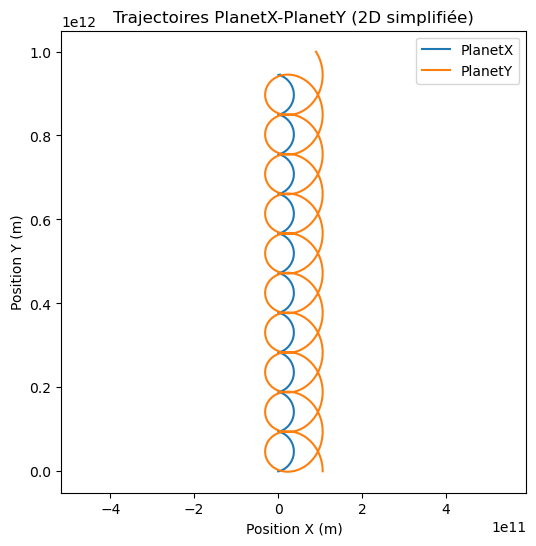

In [7]:

PlanetX = CorpsCeleste(
    masse=2.2e30,
    position=[0, 0, 0],
    vitesse=[0, 0, 0]
)

PlanetY = CorpsCeleste(
    masse=6e29,          
    position=[1.06e11, 0, 0], 
    vitesse=[0, 3.72e4, 0]    
)

liste_corps = [PlanetX, PlanetY]

# --- Paramètres de simulation ---
dt = 600.0        # 1 minute en secondes
nb_iterations = 200000
# Pour stocker les positions au fil du temps
positions_PlanetX = []
positions_PlanetY = []

# --- Boucle de simulation ---
for _ in range(nb_iterations):
    # Mise à jour de la force
    for c in liste_corps:
        c.mettre_a_jour_force(liste_corps)

    # Mise à jour de la position et de la vitesse
    for c in liste_corps:
        c.maj_position_et_vitesse(dt)

    # Enregistrement des positions actuelles
    positions_PlanetX.append(PlanetX.position.copy())
    positions_PlanetY.append(PlanetY.position.copy())

# --- Conversion en arrays NumPy pour faciliter le plotting ---
positions_PlanetX = np.array(positions_PlanetX)
positions_PlanetY = np.array(positions_PlanetY)

# --- Visualisation ---
plt.figure(figsize=(6,6))
plt.plot(positions_PlanetX[:,0], positions_PlanetX[:,1], label='PlanetX')
plt.plot(positions_PlanetY[:,0], positions_PlanetY[:,1], label='PlanetY')

plt.xlabel('Position X (m)')
plt.ylabel('Position Y (m)')
plt.title("Trajectoires PlanetX-PlanetY (2D simplifiée)")
plt.legend()
plt.axis('equal')  # Échelle identique sur X et Y
plt.show()
